In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation, Flatten, Conv2D,MaxPooling2D
import pickle


pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


X = X/255.0

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X,y,batch_size=32, epochs=10, validation_split = 0.1)



Train on 360 samples, validate on 40 samples
Epoch 1/10
360/360 [==============================] - 1s 2ms/sample - loss: 0.7003 - acc: 0.5389 - val_loss: 0.6535 - val_acc: 0.9000
Epoch 2/10
360/360 [==============================] - 1s 2ms/sample - loss: 0.5902 - acc: 0.7444 - val_loss: 0.4465 - val_acc: 0.8500
Epoch 3/10
360/360 [==============================] - 1s 2ms/sample - loss: 0.4237 - acc: 0.8083 - val_loss: 0.2955 - val_acc: 0.9250
Epoch 4/10
360/360 [==============================] - 1s 2ms/sample - loss: 0.3923 - acc: 0.8222 - val_loss: 0.3010 - val_acc: 0.9000
Epoch 5/10
360/360 [==============================] - 1s 2ms/sample - loss: 0.4147 - acc: 0.7833 - val_loss: 0.2469 - val_acc: 0.9250
Epoch 6/10
360/360 [==============================] - 1s 2ms/sample - loss: 0.3082 - acc: 0.8806 - val_loss: 0.2714 - val_acc: 0.9250
Epoch 7/10
360/360 [==============================] - 1s 2ms/sample - loss: 0.2708 - acc: 0.8917 - val_loss: 0.2755 - val_acc: 0.9250
Epoch 8/10
360/36

car


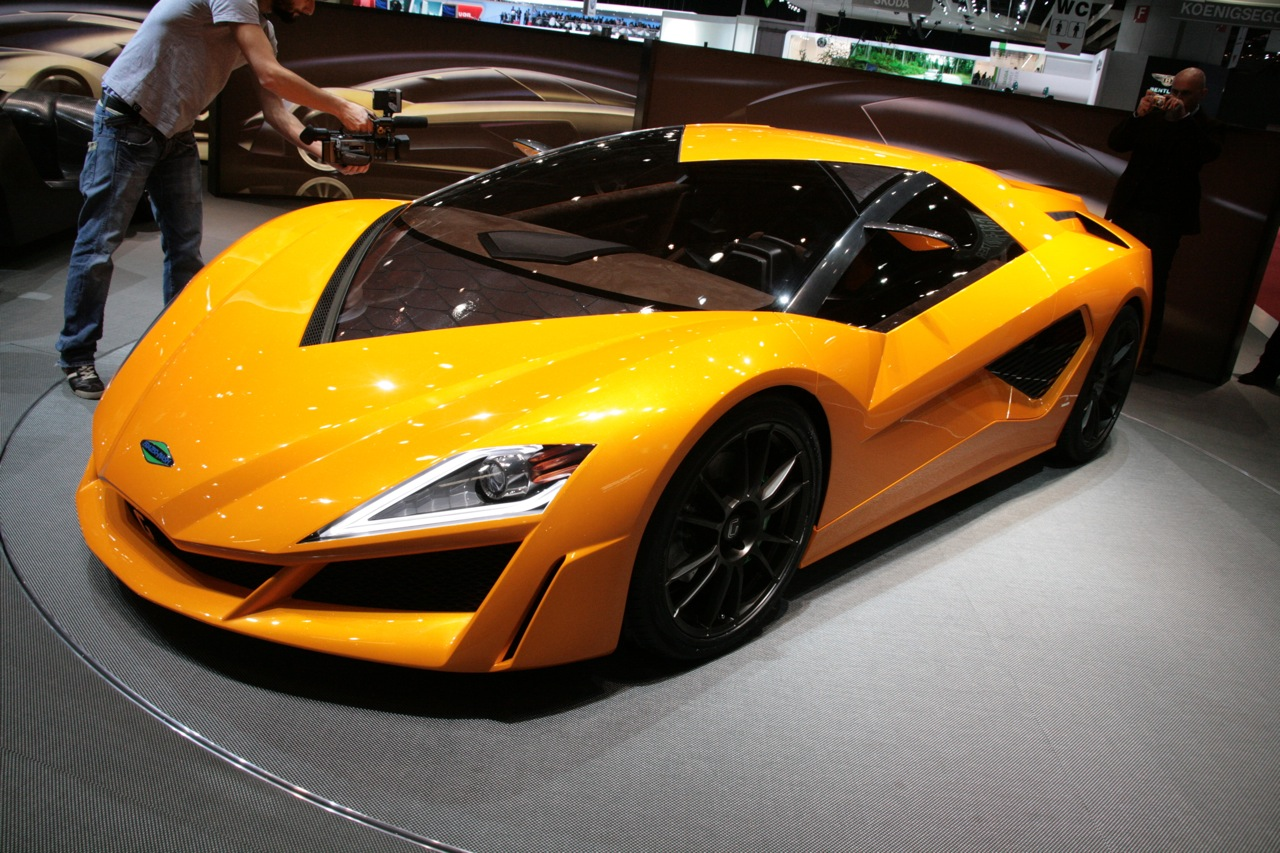

In [6]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image

CATEGORIES = ["car","plane"]

def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)
prediction = model.predict([prepare('car.jpg')])
print(CATEGORIES[int(prediction[0][0])])


Image(filename='car.jpg') 


plane


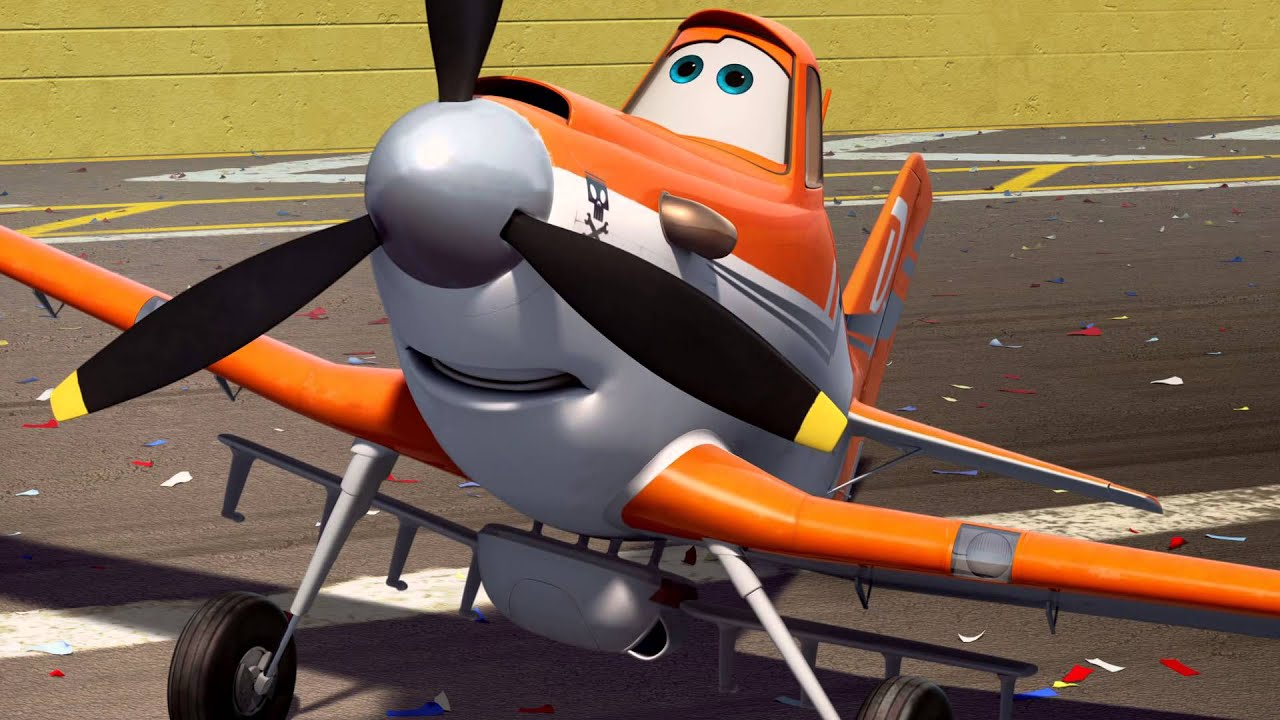

In [7]:

prediction = model.predict([prepare('plane.jpg')])
print(CATEGORIES[int(prediction[0][0])])
Image(filename='plane.jpg') 


plane


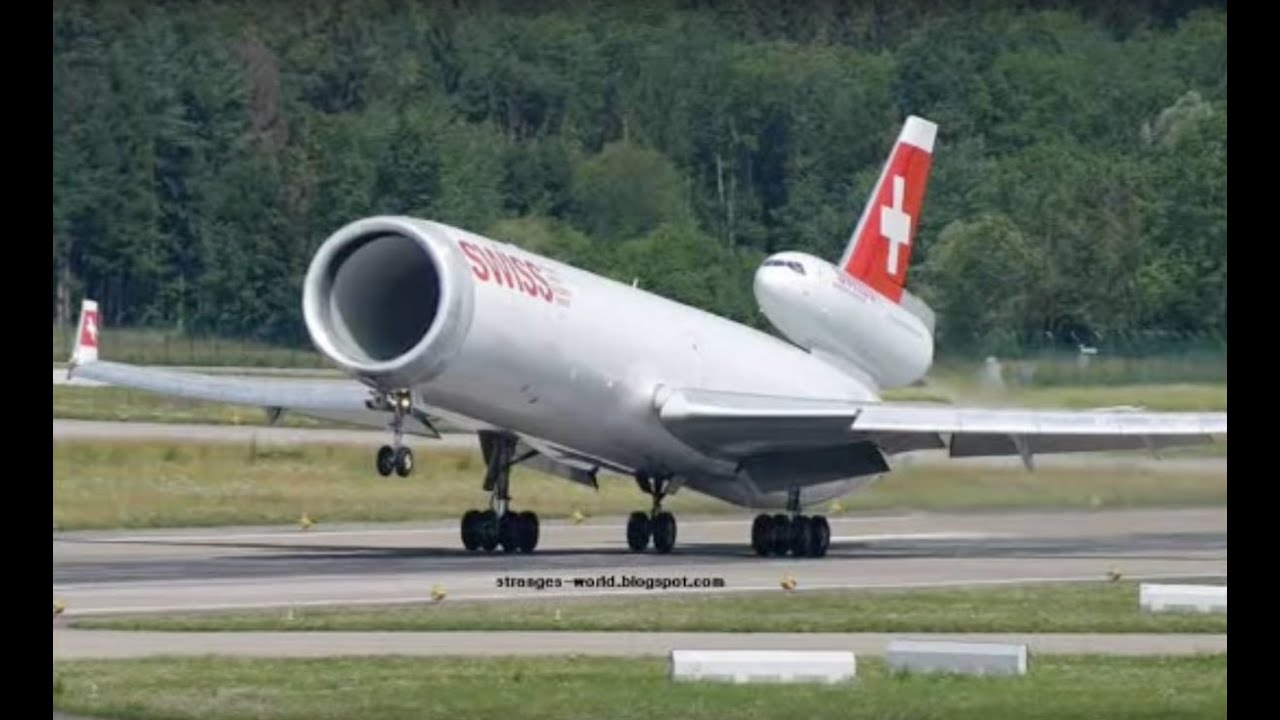

In [8]:
prediction = model.predict([prepare('head_plane.jpg')])
print(CATEGORIES[int(prediction[0][0])])
Image(filename='head_plane.jpg') 


car


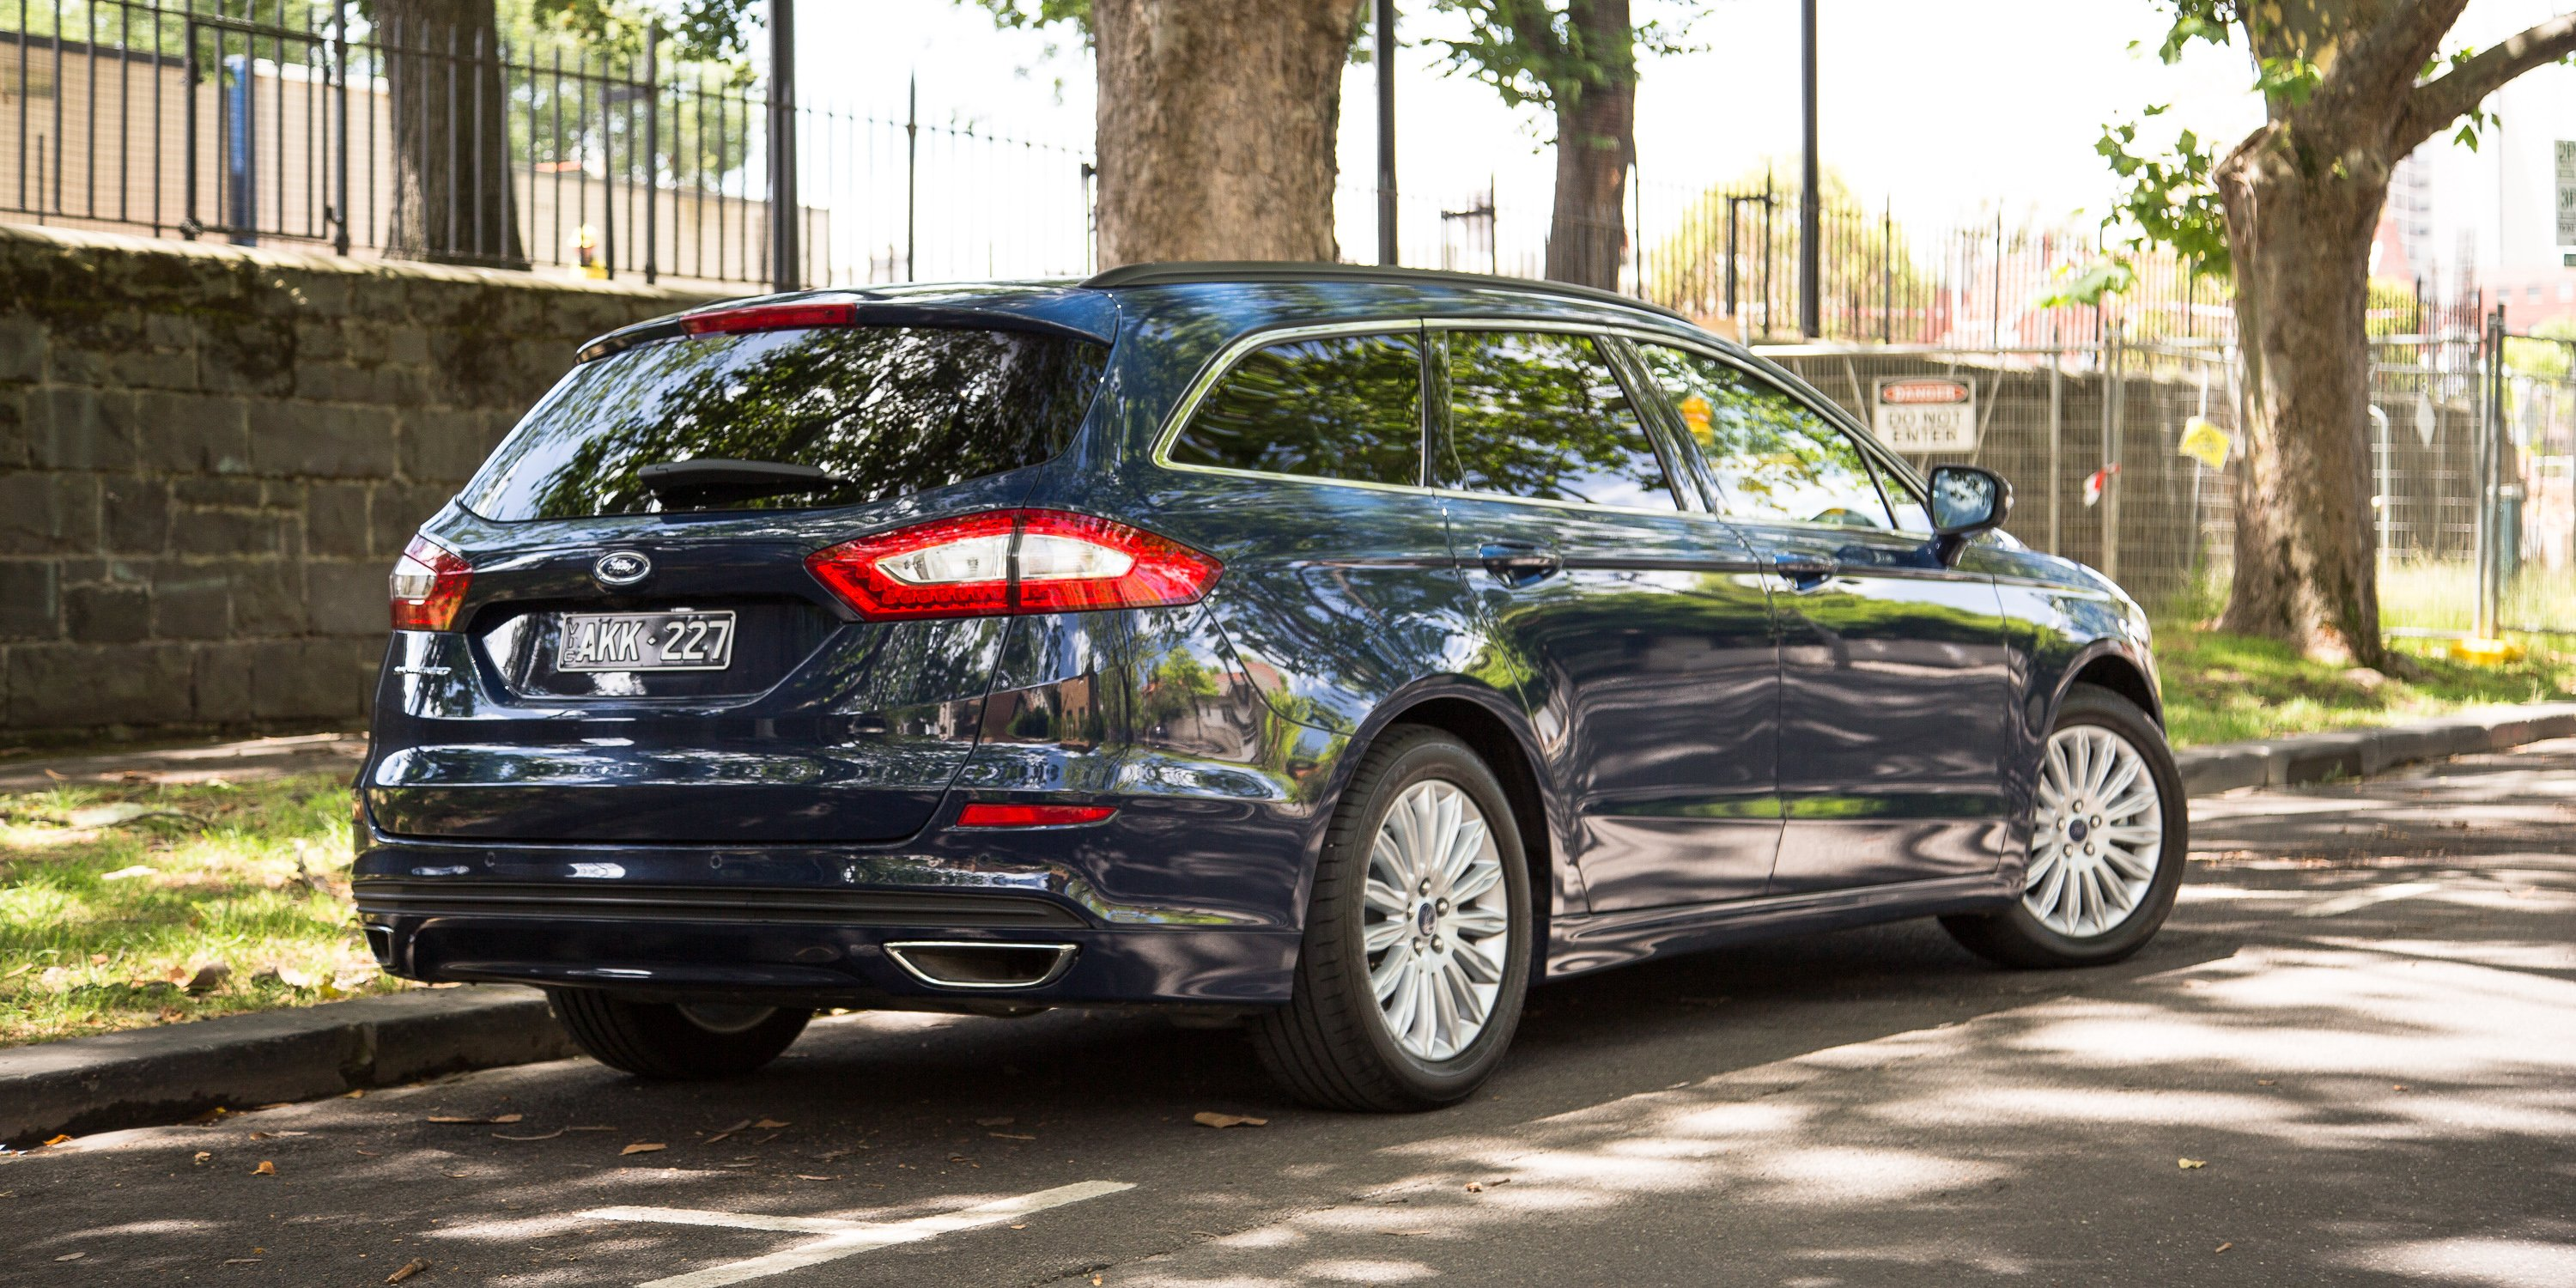

In [10]:
prediction = model.predict([prepare('car_.jpg')])
print(CATEGORIES[int(prediction[0][0])])
Image(filename='car_.jpg')